In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

sns.set_style('darkgrid')

In [2]:
msft = yf.download('MSFT', start='2018-1-1')
appl = yf.download('AAPL', start='2018-1-1')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 0, 'Apple')

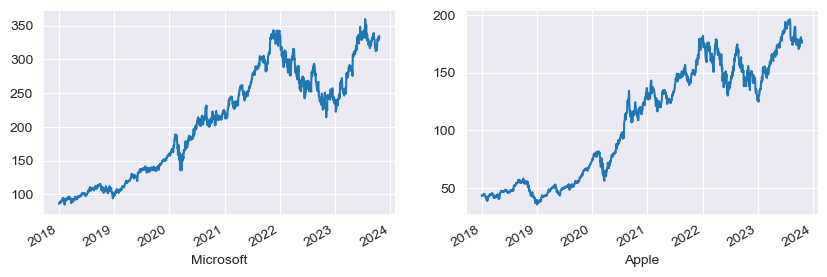

In [3]:
# Microsoftin ja Applen kehitys vuodesta 2018 alkaen
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
msft['Close'].plot(ax=axs[0])
appl['Close'].plot(ax=axs[1])
axs[0].set_xlabel('Microsoft')
axs[1].set_xlabel('Apple')

Text(0.5, 0, 'Apple')

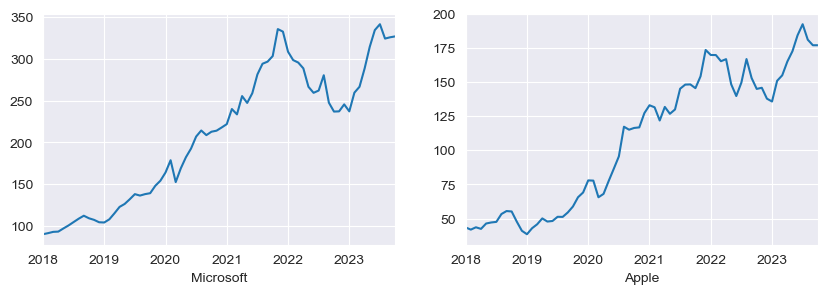

In [4]:
# aggregoidaan kuukausille, 2020 alkaen
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
msft['Close']['2018':].resample('M').mean().plot(ax=axs[0])
appl['Close']['2018':].resample('M').mean().plot(ax=axs[1])
axs[0].set_xlabel('Microsoft')
axs[1].set_xlabel('Apple')

Text(0.5, 0, 'Apple')

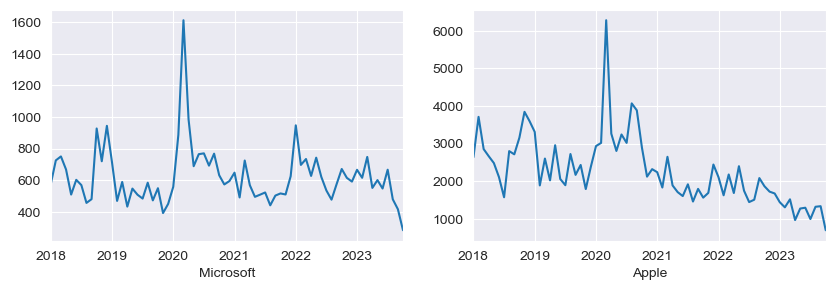

In [5]:
# osakkeiden vaihdon määrät kuukausittain
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(msft['Volume']/1000000).resample('M').sum().plot(ax=axs[0])
(appl['Volume']/1000000).resample('M').sum().plot(ax=axs[1])
axs[0].set_xlabel('Microsoft')
axs[1].set_xlabel('Apple')

## Päätöshinnat

<AxesSubplot:xlabel='Date'>

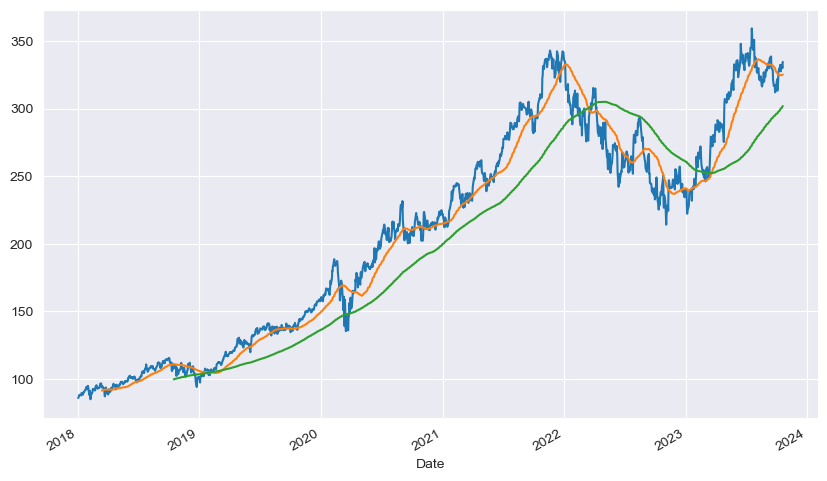

In [6]:
# Microsoftin päätöshinnat, 50 päivän keskiarvot ja 200 päivän keskiarvot
msft['Close'].plot(figsize=(10,6))
msft['Close'].rolling(50).mean().plot()
msft['Close'].rolling(200).mean().plot()

<AxesSubplot:xlabel='Date'>

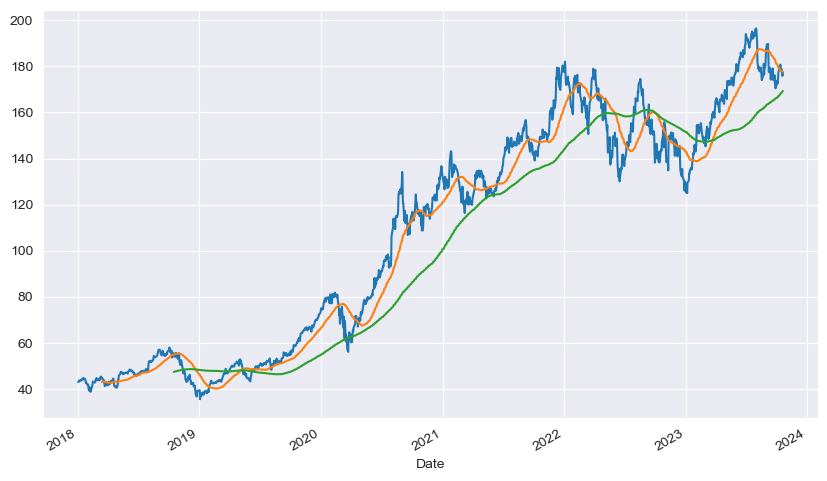

In [7]:
# Applen päätöshinnat, 50 päivän keskiarvot ja 200 päivän keskiarvot
appl['Close'].plot(figsize=(10,6))
appl['Close'].rolling(50).mean().plot()
appl['Close'].rolling(200).mean().plot()

## Hinnan muutokset

In [8]:
# hinnan muutokset prosentteina eilisestä, tehdään data
msft['Microsoft%'] = msft['Close'].pct_change()
appl['Apple%'] = appl['Close'].pct_change()
muutos = pd.concat([msft['Microsoft%'], appl['Apple%']], axis=1)

# täytetään puuttuvat arvot
muutos = muutos.fillna(0)
muutos

,Microsoft%,Apple%
Date,,
2018-01-02,0.000000,0.000000
2018-01-03,0.004654,-0.000174
2018-01-04,0.008801,0.004645
2018-01-05,0.012398,0.011385
2018-01-08,0.001020,-0.003714
...,...,...
2023-10-13,-0.010358,-0.010293
2023-10-16,0.014982,-0.000727
2023-10-17,-0.001744,-0.008785


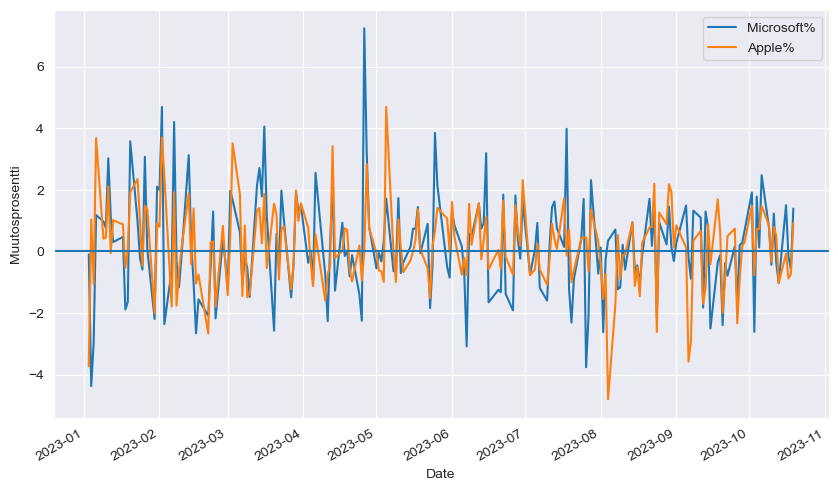

In [9]:
# Päivittäiset muutosprosentit tämän vuoden aikana
(muutos['2023':]*100).plot(figsize=(10, 6))
plt.ylabel('Muutosprosentti')

# vaakaviiva nollan kohdalle
plt.axhline()

In [10]:
(muutos*100).describe().round(2)

,Microsoft%,Apple%
count,1460.00,1460.00
mean,0.11,0.12
std,1.92,2.02
min,-14.74,-12.86
25%,-0.83,-0.85
50%,0.12,0.12
75%,1.10,1.20
max,14.22,11.98


Yllä olevasta taulukosta nähdään, että Microsoftin osakkeiden hinta on keskimääräisesti päivässä noussut 0.11% ja Applen 0.12%. Mediaani on molemmilla sama, 0.12%. Microsoftin huonoin päivä oli -14.74% ja parhain 14.22%. Applella huonoin oli -12.86% ja paras 11.98%. 

In [11]:
# haetaan päivämäärät, jolloin on tapahtunut yli 0.08% muutos
muutos[(abs(muutos['Microsoft%'])>0.08) | (abs(muutos['Apple%'])>0.08)]

,Microsoft%,Apple%
Date,,
2019-01-03,-0.036788,-0.099607
2020-03-02,0.066539,0.093101
2020-03-12,-0.094838,-0.098755
2020-03-13,0.142169,0.119808
2020-03-16,-0.147390,-0.128647
2020-03-17,0.082337,0.043970
2020-03-24,0.090896,0.100325
2020-04-06,0.074368,0.087237
2020-07-31,0.005444,0.104689


<AxesSubplot:>

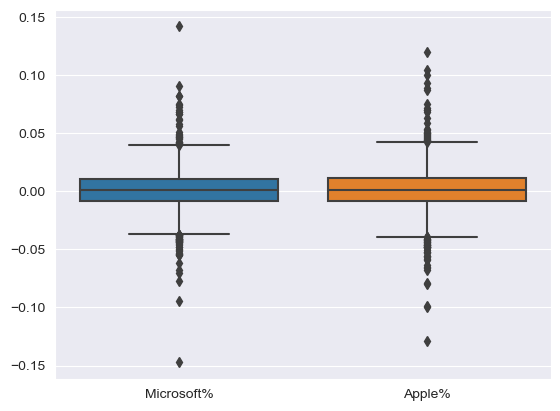

In [12]:
# Boxplot tunnusluvuista
sns.boxplot(data=muutos)

## Korrelaatio

In [13]:
# Muutosprosenttien korrelaatio
muutos.corr()

,Microsoft%,Apple%
Microsoft%,1.000000,0.751604
Apple%,0.751604,1.000000


<AxesSubplot:xlabel='Microsoft%', ylabel='Apple%'>

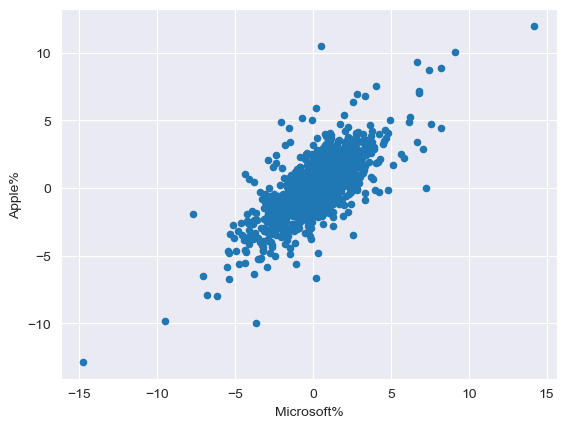

In [14]:
# Katsotaan korrelointia hajontakaavion avulla
(muutos*100).plot.scatter(x='Microsoft%', y='Apple%')

<AxesSubplot:xlabel='Date'>

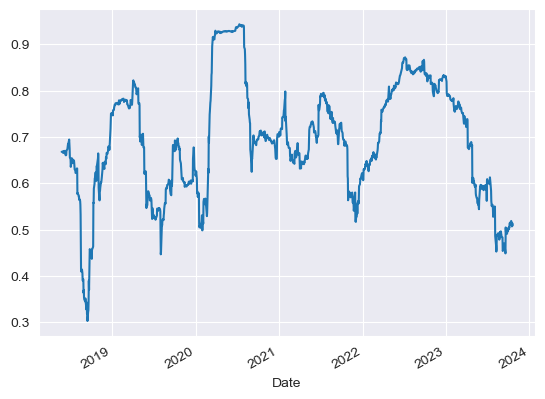

In [15]:
# liukuva korrelaatio
muutos['Microsoft%'].rolling(100).corr(muutos['Apple%']).plot()

## Volatiliteetti

<AxesSubplot:xlabel='Date'>

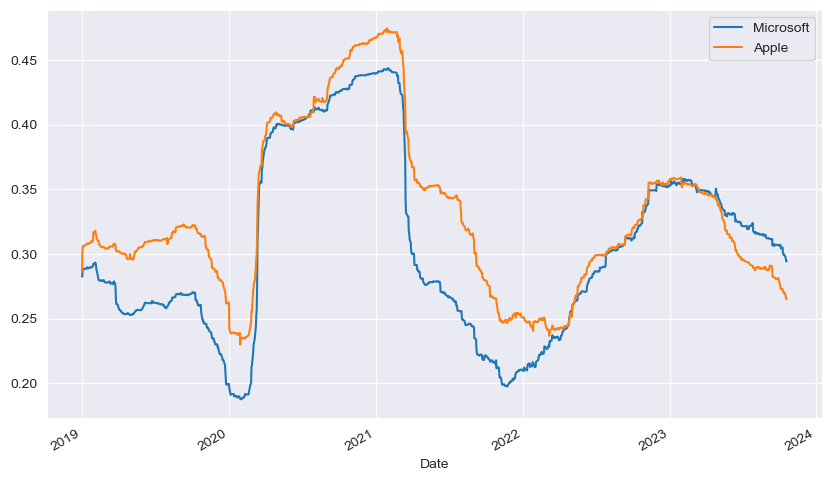

In [16]:
# 200 päivän liukuva volatiliteetti
plt.figure(figsize=(10,6))
(muutos['Microsoft%'].rolling(252).std() * (252**0.5)).plot(label='Microsoft', legend=True)
(muutos['Apple%'].rolling(252).std() * (252**0.5)).plot(label='Apple', legend=True)

## Kahden arvoakselin kaavio

Text(0.5, 1.0, 'Microsoftin ja Applen osakkeiden hinnan kehitys')

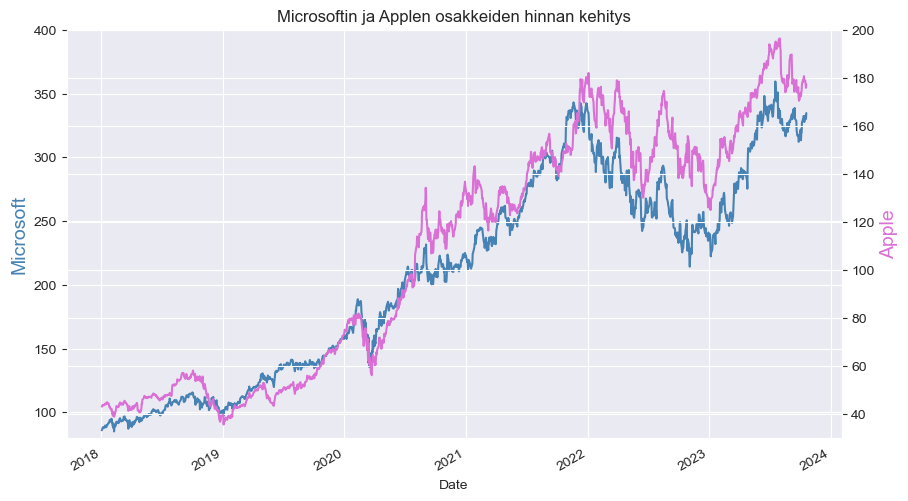

In [17]:
plt.figure(figsize=(10,6))

# Microsoftin kaavion luonti ja muokkailu
micro = msft['Close'].plot(color='steelblue')
plt.ylabel('Microsoft', color='steelblue', fontsize=14)
plt.ylim(80, 400)

# kaavio yhteisellä akselilla
apple = micro.twinx()

# Applen kaavion luonti ja muokkailu
appl['Close'].plot(color='orchid')
plt.ylabel('Apple', color='orchid', fontsize=14)
plt.ylim(30, 200)

plt.title('Microsoftin ja Applen osakkeiden hinnan kehitys')

## Viikonpäivän korrelointi tuottoon

In [18]:
viikonpaivat = ['ma', 'ti', 'ke', 'to', 'pe']
muutos['Weekday'] = muutos.index.weekday

# tehdään uusi dataframe Microsoftista
df1 = (muutos*100).groupby('Weekday')['Microsoft%'].describe()
df1.index = viikonpaivat
df1

,count,mean,std,min,25%,50%,75%,max
ma,272.0,0.056710,2.109345,-14.739031,-0.964067,0.134736,1.082663,7.570542
ti,300.0,0.039326,1.788193,-5.497839,-0.920676,-0.039441,0.992819,9.089573
ke,299.0,0.197329,1.956843,-7.715629,-0.590851,0.115711,1.169954,7.243476
to,297.0,0.156338,1.938488,-9.483829,-0.769120,0.258402,1.249297,8.226806
pe,292.0,0.103222,1.793175,-5.085290,-0.810296,0.097034,1.093391,14.216888


In [19]:
# testataan maanantain ja torstain ero
ma = muutos['Microsoft%'][muutos['Weekday']==0]
to = muutos['Microsoft%'][muutos['Weekday']==3]

from scipy.stats import ttest_ind
ttest_ind(ma, to, equal_var=False, nan_policy='omit')

# ei merkittävää eroa!

Ttest_indResult(statistic=-0.5849302745608644, pvalue=0.5588341710546859)

In [20]:
# Tehdään samat Applelle
df2 = (muutos*100).groupby('Weekday')['Apple%'].describe()
df2.index = viikonpaivat

ma = muutos['Apple%'][muutos['Weekday']==0]
to = muutos['Apple%'][muutos['Weekday']==3]

ttest_ind(ma, to, equal_var=False, nan_policy='omit')

# ei merkittävää eroa, mutta enemmän eroa kuin Microsoftilla

Ttest_indResult(statistic=1.3851167655360472, pvalue=0.16657509991119016)